In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import imghdr

In [ ]:
img_height, img_width = 128, 128
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Train/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Train/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Train/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 3079 files belonging to 7 classes.
Found 1414 files belonging to 7 classes.
Found 371 files belonging to 7 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


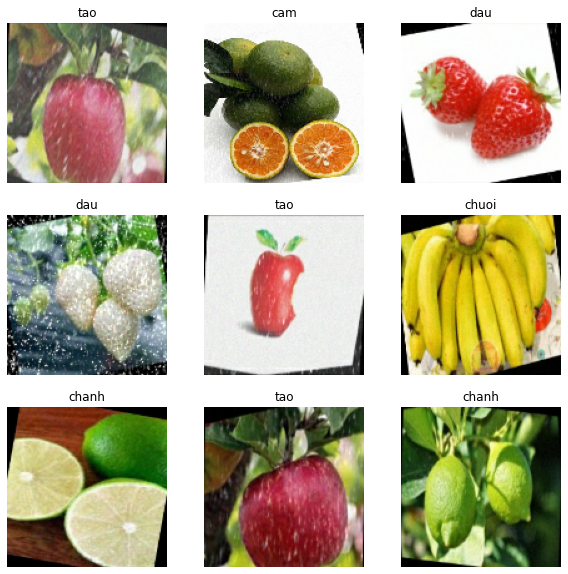

In [ ]:
# data_dir = "/content/drive/MyDrive/Train/test"
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions
# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
class_names = ["cam", "chanh", "chuoi", "dau", "duahau", "nho", "tao"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(7)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
154/154 [==============================] - 173s 1s/step - loss: 1.4256 - accuracy: 0.4164 - val_loss: 1.0528 - val_accuracy: 0.5750
Epoch 2/10
154/154 [==============================] - 176s 1s/step - loss: 0.8448 - accuracy: 0.6716 - val_loss: 0.6296 - val_accuracy: 0.7610
Epoch 3/10
154/154 [==============================] - 175s 1s/step - loss: 0.5736 - accuracy: 0.7931 - val_loss: 0.5258 - val_accuracy: 0.7963
Epoch 4/10
154/154 [==============================] - 175s 1s/step - loss: 0.4115 - accuracy: 0.8464 - val_loss: 0.3231 - val_accuracy: 0.8840
Epoch 5/10
154/154 [==============================] - 174s 1s/step - loss: 0.3194 - accuracy: 0.8847 - val_loss: 0.3817 - val_accuracy: 0.8621
Epoch 6/10
154/154 [==============================] - 172s 1s/step - loss: 0.1959 - accuracy: 0.9354 - val_loss: 0.1381 - val_accuracy: 0.9519
Epoch 7/10
154/154 [==============================] - 172s 1s/step - loss: 0.1409 - accuracy: 0.9552 - val_loss: 0.1111 - val_accuracy: 0.9668

In [ ]:
model.evaluate(test_ds)

19/19 [==============================] - 5s 249ms/step - loss: 0.0106 - accuracy: 0.9973


[0.01057169958949089, 0.9973045587539673]

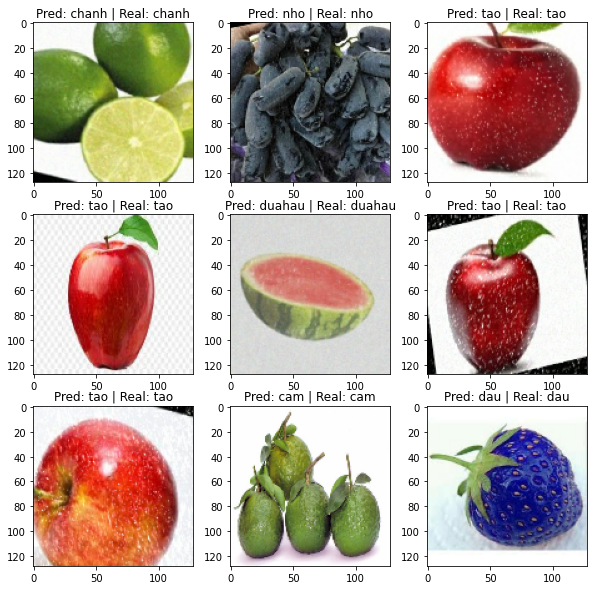

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("/content/sample_data/model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)